# Import Lib


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from google.colab.patches import cv2_imshow

# Surf installation

In [ ]:
!apt-get install -y cmake libopencv-dev build-essential git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libtesseract-dev libopenblas-dev liblapacke-dev checkinstall

In [ ]:
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

In [ ]:
%cd opencv
!mkdir build
%cd build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..
!make -j8
!make install


In [ ]:
import os
os.kill(os.getpid(), 9)

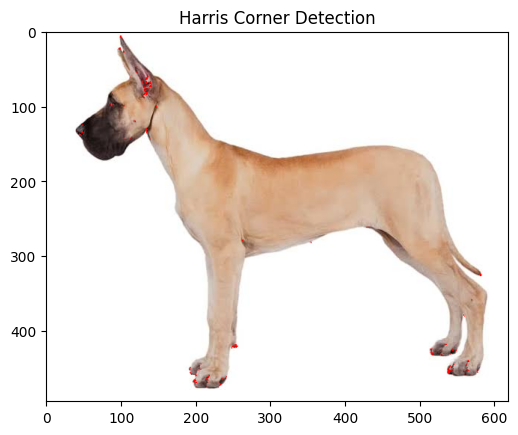

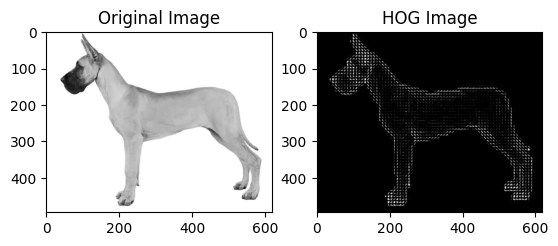

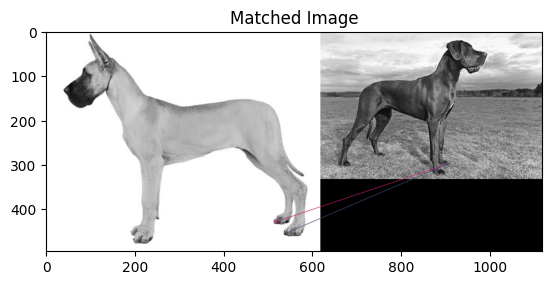

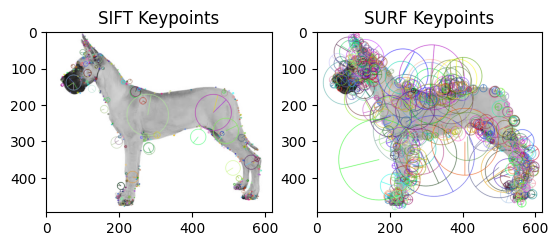

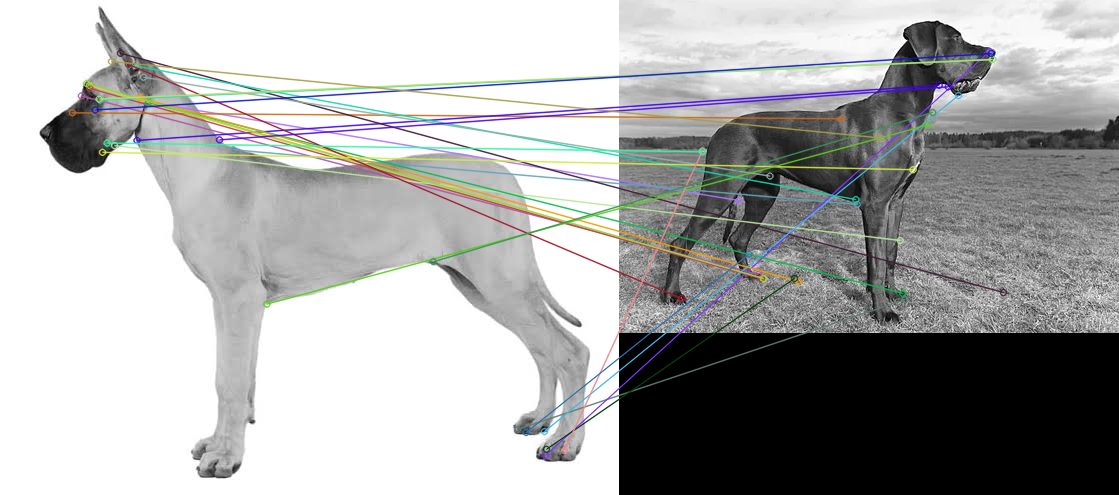

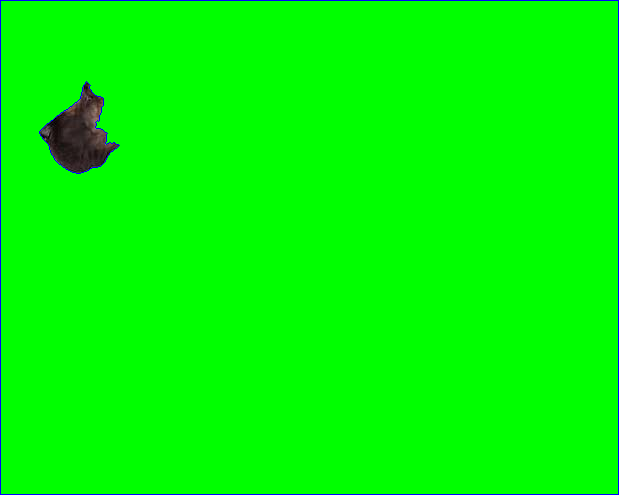

In [ ]:
# Harris Corner Detection
def harris_corner_detection(image_path):
  # Load the image
    img = cv2.imread('img1.png')
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Harris Corner Detection
    gray = np.float32(gray_img)
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

    # Mark corners on the original image
    img[corners > 0.01 * corners.max()] = [0, 0, 255]

    # Display the result
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Harris Corner Detection')
    plt.show()
harris_corner_detection('img1.png')

# HOG Feature Extraction
def hog_feature_extraction(image_path):
   # Extract HOG feature
  img = cv2.imread('img1.png')
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  hog_feature, hog_image = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                                  visualize=True, feature_vector=True)

  hog_image_rescale = exposure.rescale_intensity(hog_image, in_range=(0, 10))

  # Display the original the HOG images
  plt.subplot(1, 2, 1)
  plt.imshow(gray_image, cmap='gray')
  plt.title('Original Image')

  plt.subplot(1, 2, 2)
  plt.imshow(hog_image_rescale, cmap='gray')
  plt.title('HOG Image')
  plt.show()
hog_feature_extraction('img1.png')

# ORB Feature Matching
def orb_feature_matching(image_path1, image_path2):
    # Load the images
  img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
  img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

  # ORB detector
  orb = cv2.ORB_create()

  # Find keypoints and description with ORB
  kp1, des1 = orb.detectAndCompute(img1, None)
  kp2, des2 = orb.detectAndCompute(img2, None)

  # FLANN-based matcher
  FLANN_INDEX_LSH = 6
  index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
  search_params = dict(checks=50)
  flann = cv2.FlannBasedMatcher(index_params, search_params)

  # Match discription
  matches = flann.knnMatch(des1, des2, k=2)
  good_matches = []
  for m, n in matches:
    if m.distance < 0.7 * n.distance:
      good_matches.append(m)

  # Draw matching keypoints
  matched_image = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

  # Display the matched Image
  plt.imshow(matched_image)
  plt.title('Matched Image')
  plt.show()
orb_feature_extraction_and_matching('img1.png', 'img2.png')

# SIFT and SURF Feature Extraction
def sift_and_surf_feature_extraction(image_path1, image_path2):
    # Load the images in grayscale
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)
     # SIFT detector
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # SURF detector
    surf = cv2.xfeatures2d.SURF_create()
    kp1_surf, des1_surf = surf.detectAndCompute(img1, None)
    kp2_surf, des2_surf = surf.detectAndCompute(img2, None)

    # Draw keypoints for both SIFT and SURF
    img1_sift_kp = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
    img1_surf_kp = cv2.drawKeypoints(img1, kp1_surf, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

    # Display SIFT and SURF keypoints
    plt.subplot(1, 2, 1)
    plt.imshow(img1_sift_kp, cmap='gray')
    plt.title('SIFT Keypoints')

    plt.subplot(1, 2, 2)
    plt.imshow(img1_surf_kp, cmap='gray')
    plt.title('SURF Keypoints')
    plt.show()
sift_and_surf_feature_extraction('img1.png', 'img2.png')

# Brute Force Feature Matching
def brute_force_feature_matching(image_path1, image_path2):
    # Initialize ORB detector
    orb = cv2.ORB_create()
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    matched_image = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the matched keypoints using cv2_imshow
    cv2_imshow(matched_image)
brute_force_feature_matching('img1.png', 'img2.png')

def watershed_segmentation(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Noise removal using morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)


    unknown = cv2.subtract(sure_bg, np.uint8(sure_fg))


    _, markers = cv2.connectedComponents(np.uint8(sure_fg))
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply the Watershed algorithm
    img[markers == -1] = [255, 0, 0]
    markers = cv2.watershed(img, markers)


    img[markers == -1] = [255, 0, 0]
    img[markers == 1] = [0, 255, 0]

    # Display the segmented image
    cv2_imshow(img)

# Example usage:
watershed_segmentation('img1.png')



# Bonus Task


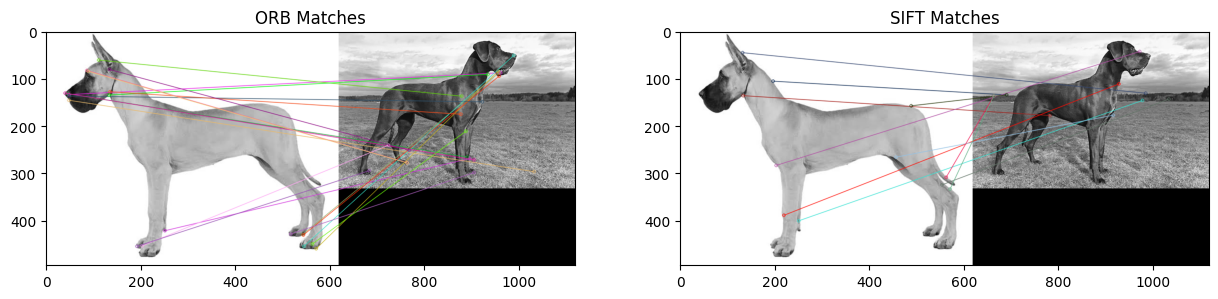

In [ ]:
import cv2
import matplotlib.pyplot as plt

def combined_feature_matching(image_path1, image_path2):
    # Load images
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    # Check if images are loaded properly
    if img1 is None:
        print(f"Error loading image from {image_path1}")
        return
    if img2 is None:
        print(f"Error loading image from {image_path2}")
        return

    # ORB feature detection
    orb = cv2.ORB_create()
    kp_orb1, des_orb1 = orb.detectAndCompute(img1, None)
    kp_orb2, des_orb2 = orb.detectAndCompute(img2, None)

    if des_orb1 is None or des_orb2 is None:
        print("ORB could not detect enough features.")
        return

    # SIFT feature detection
    sift = cv2.SIFT_create()
    kp_sift1, des_sift1 = sift.detectAndCompute(img1, None)
    kp_sift2, des_sift2 = sift.detectAndCompute(img2, None)

    if des_sift1 is None or des_sift2 is None:
        print("SIFT could not detect enough features.")
        return

    # ORB Matcher
    bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    orb_matches = bf_orb.match(des_orb1, des_orb2)

    # SIFT Matcher
    bf_sift = cv2.BFMatcher()
    sift_matches = bf_sift.knnMatch(des_sift1, des_sift2, k=2)
    good_sift_matches = [m for m, n in sift_matches if m.distance < 0.75 * n.distance]

    if len(orb_matches) == 0:
        print("No ORB matches found.")
        return
    if len(good_sift_matches) == 0:
        print("No good SIFT matches found.")
        return

    # Draw matches
    img_orb_matches = cv2.drawMatches(img1, kp_orb1, img2, kp_orb2, orb_matches[:20], None, flags=2)
    img_sift_matches = cv2.drawMatchesKnn(img1, kp_sift1, img2, kp_sift2, [[m] for m in good_sift_matches[:20]], None, flags=2)

    # Display the results
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img_orb_matches)
    plt.title("ORB Matches")

    plt.subplot(1, 2, 2)
    plt.imshow(img_sift_matches)
    plt.title("SIFT Matches")
    plt.show()

# Example Usage:
combined_feature_matching("img1.png", "img2.png")
